In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
import pcmdpy as ppy
%matplotlib inline

In [25]:
f = ppy.instrument.default_ngc3377_filters()
iso_model = ppy.isochrones.Isochrone_Model(f)
driv = ppy.driver.Driver(iso_model)

GPU acceleration not available. Continuing without.

In [26]:
g = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.SingleFeH(),
    ppy.dustmodels.SingleDust(),
    ppy.sfhmodels.SSPModel(),
    ppy.distancemodels.VariableDistance()
)

In [56]:
sky = [126.9, 76.5]

In [58]:
for i, Np in enumerate([3, 4, 5]):
    for j, fm in enumerate([0.0, 0.25, 0.5]):
        r = j + 3*i + 1
        g.set_params(np.array([0.0, -1.5, Np, 9.8, 30.0]))
        pcmd, _ = driv.simulate(g, 256, fudge_mag=fm, sky_noise=sky)
        np.savetxt(f'../data/fudge_test/r{r}.pcmd', pcmd.T, fmt='%.9f')

In [54]:
Np = 1e3

fm = 0.0
Npix = np.log10(2*Np / (1. + 10.**(0.4*fm)))
g.set_params(np.array([0.0, -1.5, Npix, 10.0, 30.0]))
pcmd_1, _ = driv.simulate(g, 256, fudge_mag=fm)

fm = 0.25
Npix = np.log10(2*Np / (1. + 10.**(0.4*fm)))
g.set_params(np.array([0.0, -1.5, Npix, 10.0, 30.0]))
pcmd_2, _ = driv.simulate(g, 256, fudge_mag=fm)

fm = 0.5
Npix = np.log10(2*Np / (1. + 10.**(0.4*fm)))
g.set_params(np.array([0.0, -1.5, Npix, 10.0, 30.0]))
pcmd_3, _ = driv.simulate(g, 256, fudge_mag=fm)

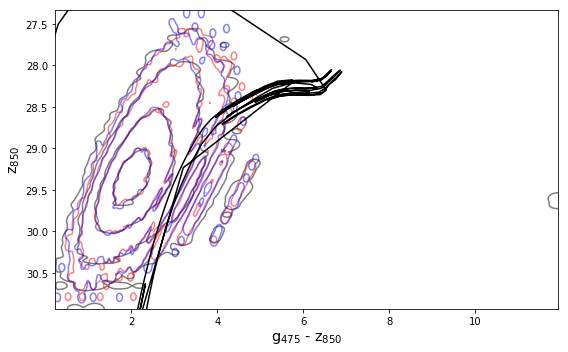

In [55]:
fig, ax = plt.subplots(figsize=(8, 5))
ppy.plotting.plot_pcmd_contours(pcmd_1, ax=ax, color='k', alpha=0.5)
ppy.plotting.plot_pcmd_contours(pcmd_2, ax=ax, color='r', alpha=0.5, keep_limits=True)
ppy.plotting.plot_pcmd_contours(pcmd_3, ax=ax, color='b', alpha=0.5, keep_limits=True)
ppy.plotting.plot_isochrone(iso_model, dmod=32.0, axes=ax)
# ax.set_xlim([1.0, 2.5])
# ax.set_ylim([27, 26])
plt.tight_layout()

In [44]:
x = np.random.uniform(1.0, 10.**(0.4*0.5), size=(256, 256, 1))

In [43]:
np.std(pcmd_3[1])

0.14869179

In [37]:
10.**(0.4*0.25)

1.2589254117941673